![test](ceg2707_logo_notebook.png)

# Map projections

Here I document various maps I use in my lectures for the CEG2719 Map Projections module.


In [1]:
import pyproj
import pygmt
import numpy as np
import shapely.geometry as sgeom
from geopandas import GeoSeries
from pyproj import Geod

#pygmt.config(GMT_THEME="/home/koulali/pltheme/darkmode")


## Tissot's indicatrix

This is not a Tissot’s indicatrix code, which visualize a projection’s distortion by computation at specific points; instead, the blue small circles of 400km radius are projected to provide a way to vizualise the distortion. Solution from [stackoverflow](https://stackoverflow.com/questions/31492220/how-to-plot-a-tissot-with-cartopy-and-matplotlib)

In [2]:
def circle(geod, lon, lat, radius, n_samples=360):
    """
    Return the coordinates of a geodetic circle of a given
    radius about a lon/lat point.

    Radius is in meters in the geodetic's coordinate system.

    """
    lons, lats, back_azim = geod.fwd(np.repeat(lon, n_samples),
                                     np.repeat(lat, n_samples),
                                     np.linspace(360, 0, n_samples),
                                     np.repeat(radius, n_samples),
                                     radians=False,
                                     )
    return lons, lats

In [3]:
geod = Geod(ellps='WGS84')

radius_km = 400
n_samples = 80

geoms = []
for lat in np.linspace(-80, 80, 10):
    for lon in np.linspace(-180, 180, 7, endpoint=False):
        lons, lats = circle(geod, lon, lat, radius_km * 1e3, n_samples)
        geoms.append(sgeom.Polygon(zip(lons, lats)))

gdf = GeoSeries(geoms)

## Equidistant Cylindrical projection

Known also as Plate Carrée projection, is a simple map projection attributed to Marinus of Tyre, who Ptolemy claims invented the projection about AD 100.

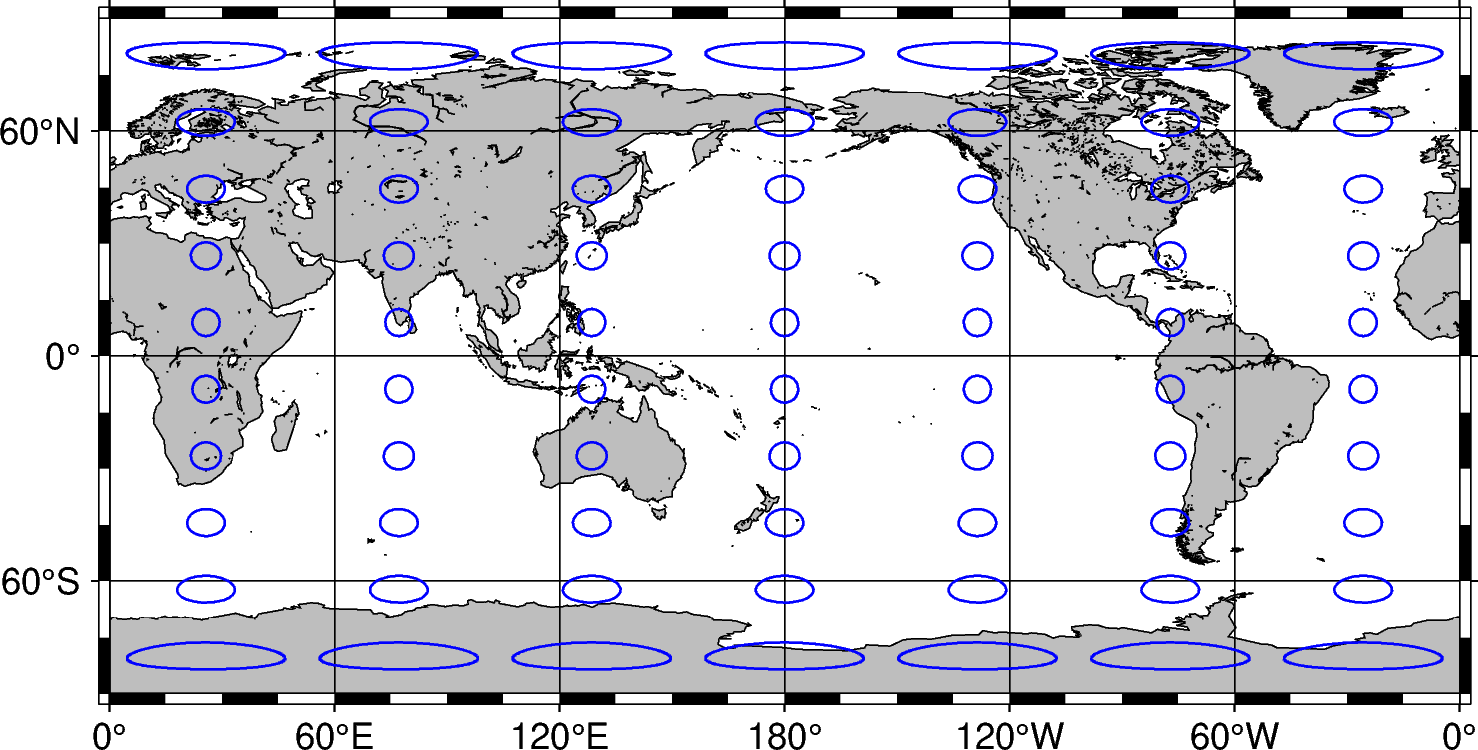

In [13]:
Tissot = True
fig = pygmt.Figure()
fig.coast(projection="Q4.5i", region="g", frame="afg", land="gray", shorelines=True)
if (Tissot):
    fig.plot(
        data=gdf,
        pen="0.5p,blue",
    )
fig.show(width=900)

## Cylindrical equal area projection

This projection is cylindrical in normal, has a normal aspect and equal-area, that means any two areas in the map have the same relative size compared to their size on the sphere.
A world map centered on the 35ºE meridian using the Behrman projection (Figure Behrman cylindrical projection) can be obtained:

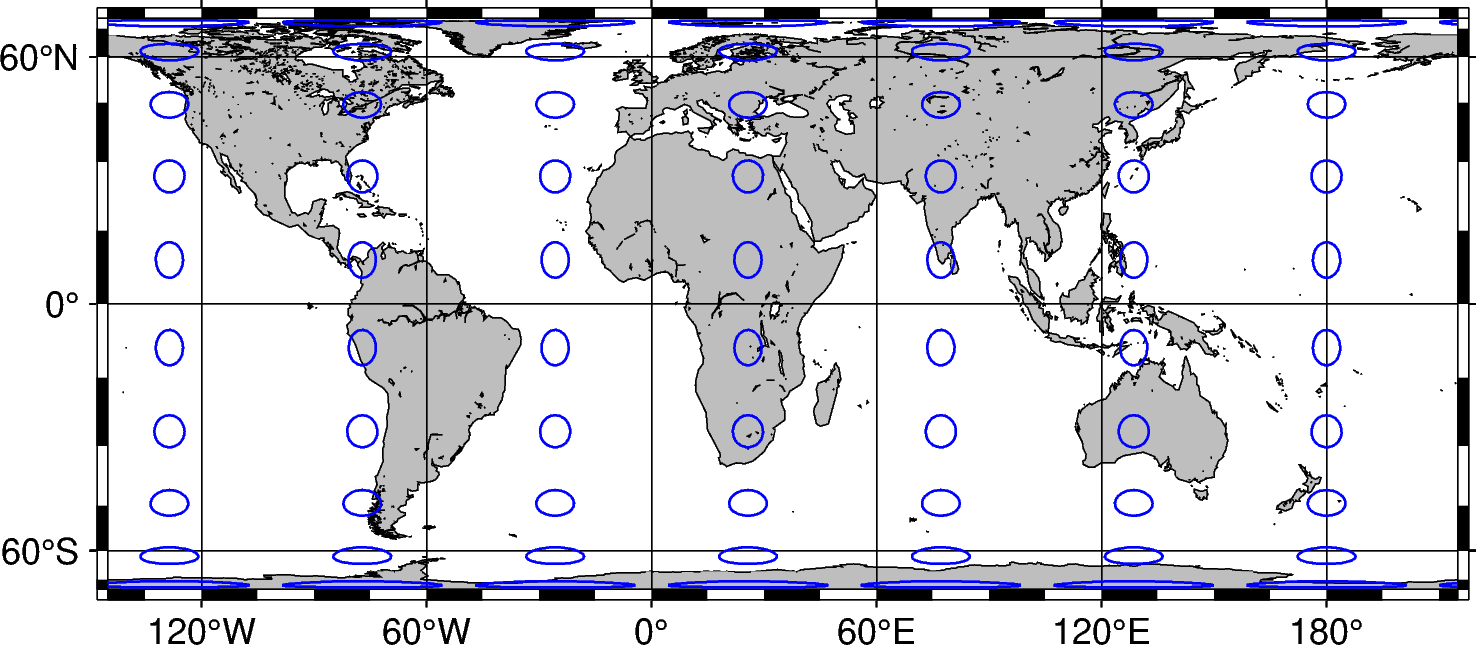

In [15]:
Tissot = True
fig = pygmt.Figure()
fig.coast(projection="Y35/30/4.5i", region="-145/215/-90/90", frame="afg", land="gray", shorelines=True)
if (Tissot):
    fig.plot(
        data=gdf,
        pen="0.5p,blue",
    )
fig.show(width=900)

## Gall-Peters

The Gall–Peters projection is a rectangular, equal-area map projection. Like all equal-area projections, it distorts most shapes. It is a cylindrical equal-area projection with latitudes 45° north and south as the regions on the map that have no distortion.

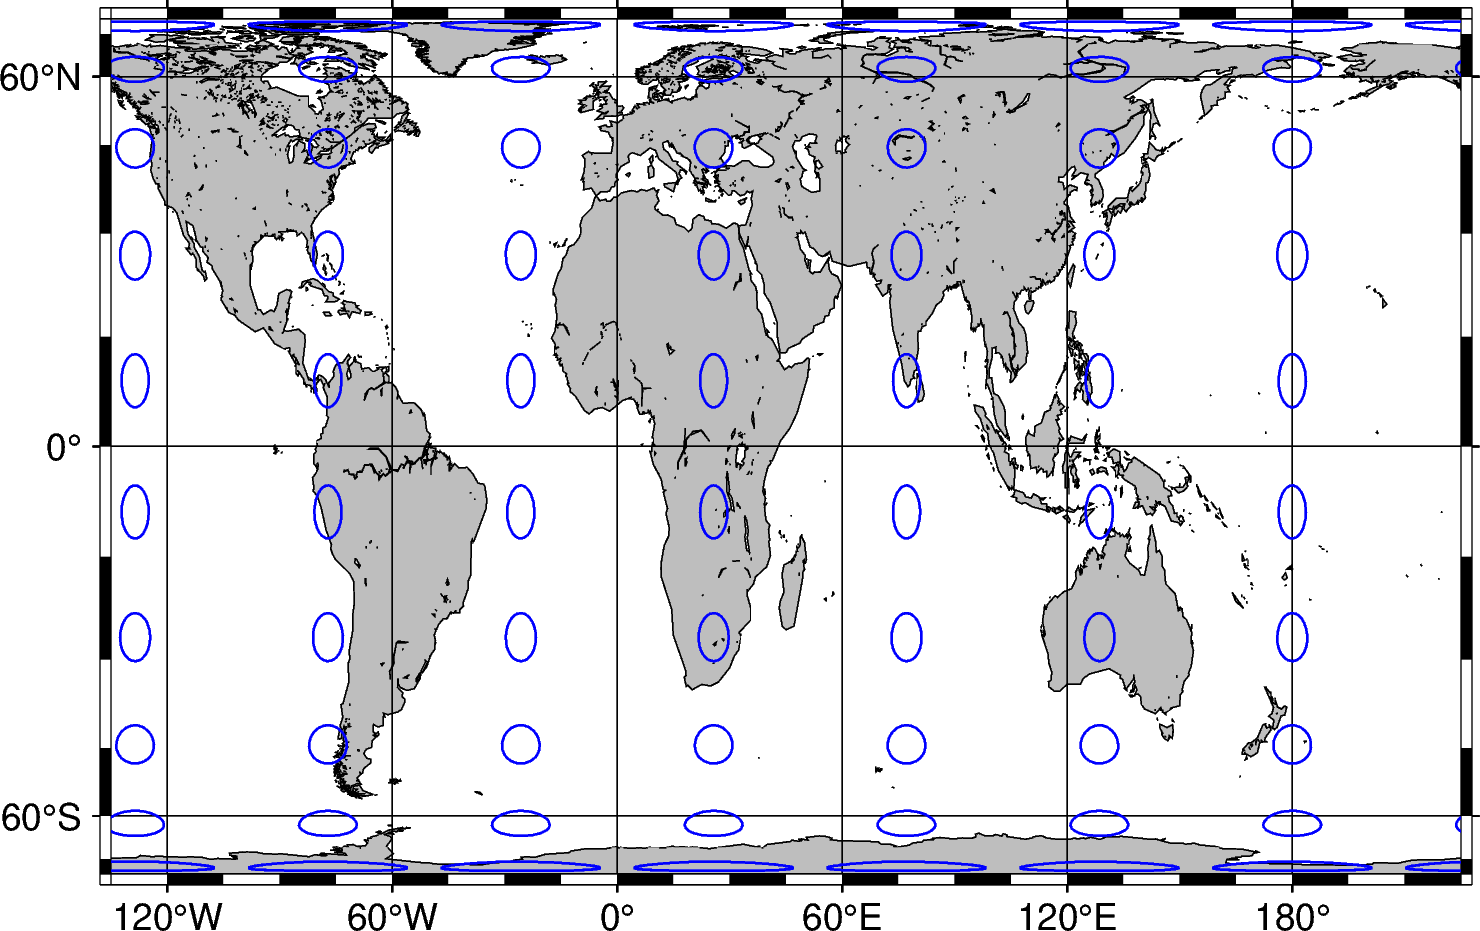

In [16]:
Tissot = True
fig = pygmt.Figure()
fig.coast(projection="Y45/45/4.5i", region="-145/215/-90/90", frame="afg", land="gray", shorelines=True)
if (Tissot):
    fig.plot(
        data=gdf,
        pen="0.5p,blue",
    )
fig.show(width=900)

## Mercator

Introduced by Gerardus Mercator in 1569 / Normal aspect
- Graticule:
    - meridians are equally-spaced vertical straight lines
    - parallels are unequally-spaced horizontal lines of equal length, closest near the Equator, cutting meridians at right angles.

This example is centered on the Dateline with a scale of 0.012 inch pr degree.

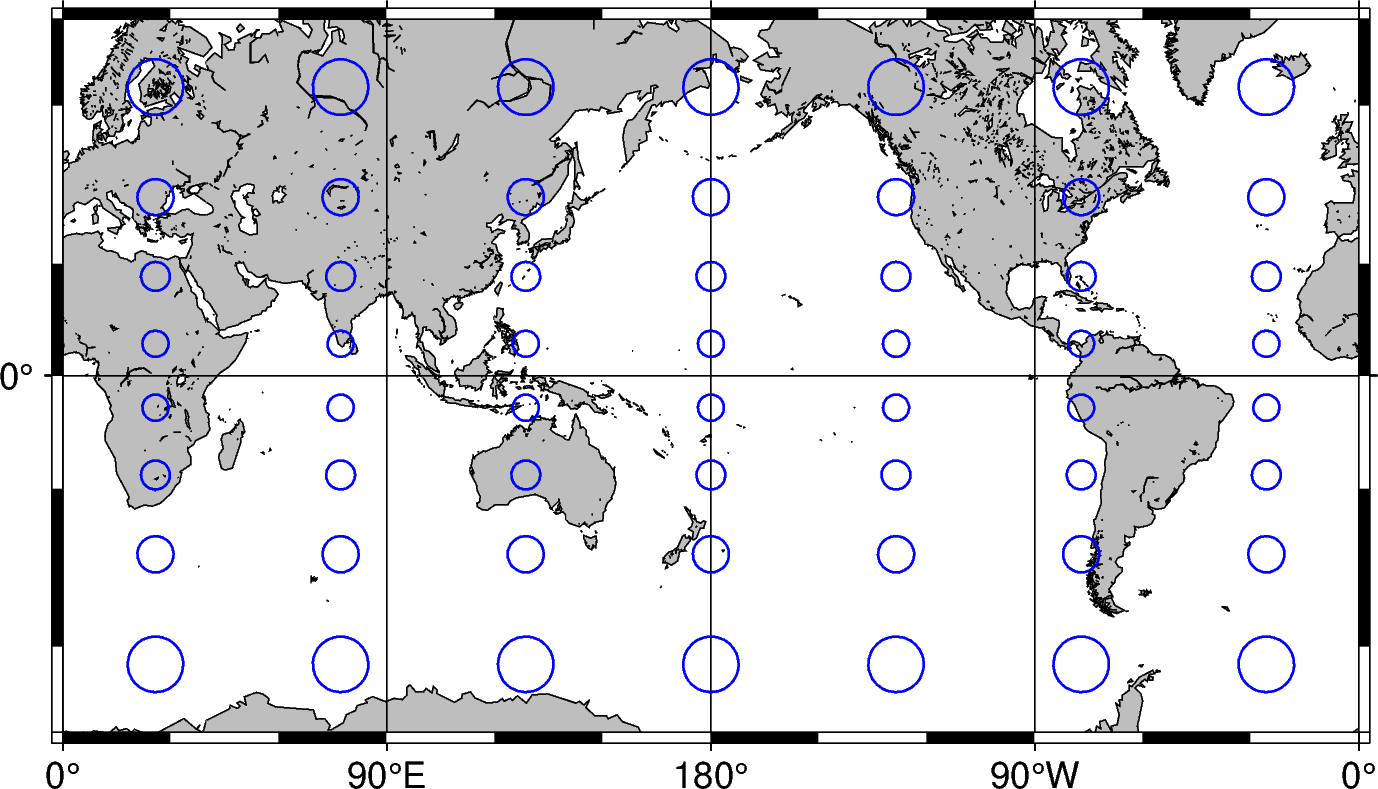

In [18]:
Tissot = True
fig = pygmt.Figure()
fig.coast(projection="m1.2e-2i", region="0/360/-70/70", frame="afg", land="gray", shorelines=True)
if (Tissot):
    fig.plot(
        data=gdf,
        pen="0.5p,blue",
    )
fig.show(width=900)